### Task1
Solve system of nonlinear equations:

$$x^2+y^2+z^2=1$$
$$2x^2+y^2-4z=0$$
$$3x^2-4y+z^2=0$$

In [18]:
# %matplotlib inline

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np

# import numpy as np

# def f_1(x, y):
#     return np.sqrt(np.ones(x.shape) - np.power(x, 2) - np.power(y, 2))

# def f_2(x, y):
#     return (2 * np.power(x, 2) + np.power(y, 2)) / 4

# def f_3(x, y):
#     return np.sqrt(-3 * np.power(x, 2) + 4 * np.power(y, 2))

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# u = np.linspace(0, 2 * np.pi, 50)
# v = np.linspace(0, np.pi, 50)

# x = np.outer(np.cos(u), np.sin(v))
# y = np.outer(np.sin(u), np.sin(v))
# z = np.outer(np.ones(np.size(u)), np.cos(v))
# ax.plot_surface(x, y, z, linewidth=0.0, cstride=2, rstride=2)

# x = np.arange(-3, 3, 0.05)
# y = np.arange(-3, 3, 0.05)
# x, y = np.meshgrid(x, y)
# z = np.array(f_2(x.ravel(), y.ravel()))
# z = z.reshape(x.shape)
# ax.plot_surface(x, y, z, color='r')

# x = np.arange(-3, 3, 0.05)
# y = np.arange(0, 3, 0.05)
# x, y = np.meshgrid(x, y)
# z = np.array(f_3(x.ravel(), y.ravel()))
# z = z.reshape(x.shape)
# ax.plot_surface(x, y, z, color='g')

In [2]:
import sympy as sym
import numpy as np
from scipy.linalg import solve

N = 3

def Newton(F, Jacobian):

    eps = 1e-3
    
    curValues = np.array([0.5, 0.5, 0.5], dtype="float")

    FCur = F(*curValues)
    JacobianCur = Jacobian(*curValues)

    delta = solve(JacobianCur, FCur).reshape((N, ))
    curValues += delta
    
    while np.linalg.norm(delta) > eps:
        
        curValues -= delta

        FCur = F(*curValues)
        JacobianCur = Jacobian(*curValues)

        delta = solve(JacobianCur, FCur).reshape((N, ))

    return curValues

vars = ['x', 'y', 'z']
funcs = ['x ** 2 + y ** 2 + z ** 2 - 1',
         '2 * x ** 2 + y ** 2 - 4 * z',
         '3 * x ** 2 - 4 * y + z ** 2']

F = sym.Matrix(funcs)
Jacobian = sym.Matrix(funcs).jacobian(vars)

Jacobian = sym.lambdify(sym.symbols(vars), Jacobian)
F = sym.lambdify(sym.symbols(vars), F)

values = Newton(F, Jacobian)
space = ' '

print(f"Answer is x: {values[0]:.5f}\n{space:>10}y: {values[1]:.5f}\n{space:>10}z: {values[2]:.5f}\n")

Answer is x: 0.78521
          y: 0.49661
          z: 0.36992



### Task2
Given the value of the Laplace function, find its argument x
$$ Ф(x) = \frac{1}{\sqrt{2\pi}}\int_0^x e^{\frac{-t^2}{2}} dt $$

In [27]:
import math

def f(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-(x ** 2) / 2)

def simpson(xCur):
    steps = 100
    step = xCur / (steps * 2)

    xValues = np.array([i * step for i in range(steps * 2 + 1)])
    funcValues = np.array([f(x_i) for x_i in xValues])

    sumX1 = 4 * np.sum([funcValues[2 * i - 1] for i in range(1, steps)])
    sumX2 = 2 * np.sum([funcValues[2 * i] for i in range(1, steps - 1)])

    return (step / 3) * (funcValues[0] + funcValues[-1] + sumX1 + sumX2)

def calculate(fValueCur):
    xCur = 0
    eps = 1e-5

    while simpson(xCur) < fValueCur:
        xCur += 0.01

    return xCur - 0.01

fValueCur = float(input("\nEnter current value of Laplace function: "))

if 0 <= fValueCur <= 1/2:
    ans = calculate(fValueCur)
    print(f"Current argument for {fValueCur:.5f} is: {ans:.5f}")
else:
    print("Wrong input function value!")

Current argument for 0.30000 is: 0.85000


### Task3
Solve numerically the boundary value problem for the differential equation
$${y''-y^3=x^2}$$
$$0<=x<=1$$
$$x=0, y=1$$
$$x=1, y=3$$

In [35]:
import sympy as sym
import numpy as np
from scipy.linalg import solve

N = 100

def Newton(F, Jacobian, initValues):

    eps = 1e-3
    
    curValues = np.array(initValues, dtype="float")

    FCur = F(*curValues)
    JacobianCur = Jacobian(*curValues)

    delta = solve(JacobianCur, FCur).reshape((N + 1, ))
    curValues += delta
    
    while np.linalg.norm(delta) > eps:
        
        curValues -= delta

        FCur = F(*curValues)
        JacobianCur = Jacobian(*curValues)

        delta = solve(JacobianCur, FCur).reshape((N + 1, ))

    return curValues

start = [0, 1]
end = [1, 3]

step = (end[0] - start[0]) / N
xValues = np.array([i * step for i in range(N + 1)])

vars = [f'y{i}' for i in range(N + 1)]

funcs = [f'{vars[i - 1]} - 2 * {vars[i]} + {vars[i + 1]} - ({step} ** 2) * ({vars[i]} ** 3 + {xValues[i]} ** 2)' for i in range(1, N)]
funcs.extend(['y0 - 1', f'y{N} - 3'])

F = sym.Matrix(funcs)
Jacobian = sym.Matrix(funcs).jacobian(vars)

Jacobian = sym.lambdify(sym.symbols(vars), Jacobian)
F = sym.lambdify(sym.symbols(vars), F)

delta = (end[1] - start[1]) / (end[0] - start[0])
initValues = [start[1] + delta * i * step for i in range(N + 1)]

yValues = Newton(F, Jacobian, initValues)


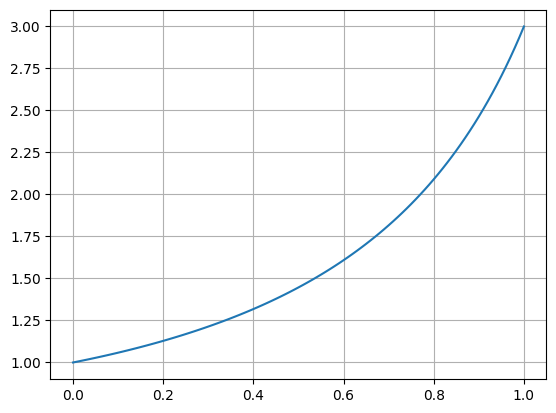

In [36]:
# %matplotlib inline

import matplotlib.pyplot as plt

plt.grid()
plt.plot(xValues, yValues)